          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0                   70.0   
3.0             210.0           

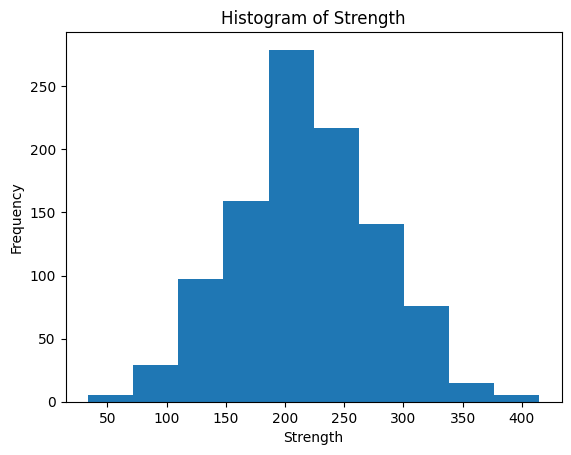

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('composite.csv')

print(df.head())
mean_strength = df['Strength'].mean()
print(f'Mean Strength: {mean_strength:.2f}')

plt.hist(df['Strength'], bins=10)
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.title('Histogram of Strength')
plt.show()

In [14]:
print("First few rows of the dataset:")
print(df.head())

print("\nLast few rows of the dataset:")
print(df.tail())

print("\nInformation about the dataset:")
print(df.info())

print("\nDescriptive statistics for numerical features:")
print(df.describe())


First few rows of the dataset:
          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0                   70.0   
3

In [15]:
mean_weight = df['Weight'].mean()
std_weight = df['Weight'].std()

print(f'Mean Weight: {mean_weight:.2f}')
print(f'Standard Deviation of Weight: {std_weight:.2f}')


Mean Weight: 57.25
Standard Deviation of Weight: 12.33


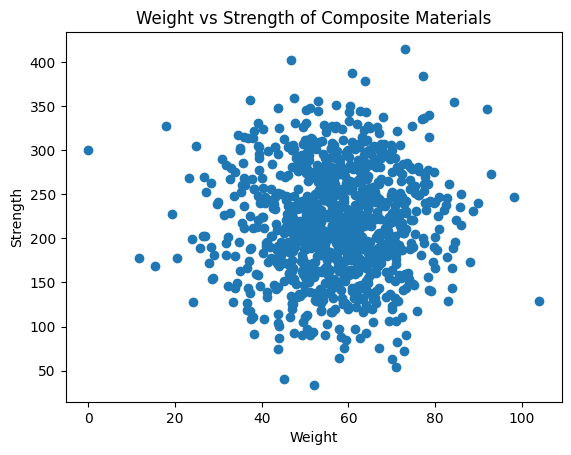

In [16]:
plt.scatter(df['Weight'], df['Strength'])
plt.xlabel('Weight')
plt.ylabel('Strength')
plt.title('Weight vs Strength of Composite Materials')
plt.show()

In [17]:
correlation = df['Weight'].corr(df['Strength'])

print(f'Correlation between Weight and Strength: {correlation:.2f}')

Correlation between Weight and Strength: 0.01


In [18]:
df['Strength Rank'] = df['Strength'].rank(ascending=False)

print(df[['Density, kg/m3', 'Strength', 'Strength Rank']])

     Density, kg/m3  Strength  Strength Rank
0.0      738.736842     220.0          496.5
1.0      738.736842     220.0          496.5
2.0      738.736842     220.0          496.5
3.0      738.736842     220.0          496.5
4.0      753.000000     220.0          496.5
..              ...       ...            ...
NaN             NaN       NaN            NaN
NaN             NaN       NaN            NaN
NaN             NaN       NaN            NaN
NaN             NaN       NaN            NaN
NaN             NaN       NaN            NaN

[1040 rows x 3 columns]


In [19]:
import seaborn as sns

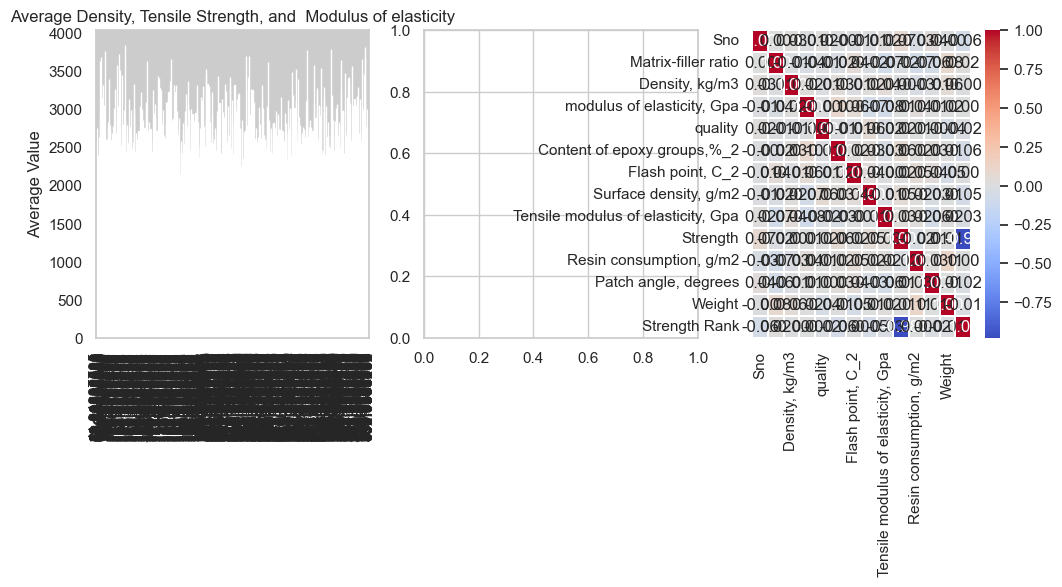

In [20]:
data=df
grouped = data.groupby(["Strength"]).mean()

sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
grouped[['Density, kg/m3', 'quality', 'Tensile modulus of elasticity, Gpa']].plot(kind="bar", ax=ax[0], legend=False)
ax[0].set_xlabel("")
ax[0].set_ylabel("Average Value")
ax[0].set_title("Average Density, Tensile Strength, and  Modulus of elasticity")

corr = data.corr()
sns.set(style="whitegrid")
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)
plt.show()

In [21]:
print(data.head())
missing_values = data.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0                   70.0   
3.0             210.0           

In [22]:
data_filled_constant = data.fillna(0)
data_filled_mean = data.fillna(data.mean())
data_filled_median = data.fillna(data.median())
data_filled_ffill = data.fillna(method='ffill')
data_filled_bfill = data.fillna(method='bfill')
print("Data with missing values filled with a constant:")
print(data_filled_constant.head())
print("Data with missing values filled with mean:")
print(data_filled_mean.head())
print("Data with missing values filled with median:")
print(data_filled_median.head())
print("Data with missing values filled using forward fill:")
print(data_filled_ffill.head())
print("Data with missing values filled using backward fill:")
print(data_filled_bfill.head())

Data with missing values filled with a constant:
          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0          

C:\Users\Jayasimma PC\AppData\Local\Temp\ipykernel_6952\2201764625.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_ffill = data.fillna(method='ffill')
C:\Users\Jayasimma PC\AppData\Local\Temp\ipykernel_6952\2201764625.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_bfill = data.fillna(method='bfill')


In [23]:
print(data.head())
data_cleaned_rows = data.dropna()
data_cleaned_cols = data.dropna(axis=1)
print("Data with rows containing missing values removed:")
print(data_cleaned_rows.head())
print("Data with columns containing missing values removed:")
print(data_cleaned_cols.head())

          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0                   70.0   
3.0             210.0           

In [24]:
data_cleaned_rows_thresh = data.dropna(thresh=5)
data_cleaned_cols_thresh = data.dropna(axis=1, thresh=10)

In [25]:
print(data.head())
unique_values_column1 = data['Weight'].unique()
print("\nUnique values in column1:", unique_values_column1)

          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0                   70.0   
3.0             210.0           

In [37]:
print("Original Dataset:")
print(df.head())

Original Dataset:
          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0                   70.0   
3.0           

In [20]:
#
data1 = pd.read_csv("composite.csv")
data2 = pd.read_csv("data_Y.csv")

print("Data 1:")
print(data1.head())

print("\nData 2:")
print(data2.head())
merged_data = pd.merge(data1, data2, on='quality')
print("\nMerged Dataset:")
print(merged_data.head())

Data 1:
          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0                   70.0   
3.0             210.0   

In [21]:
df = pd.read_csv('composite.csv')
missing_values = df.isnull().sum()
data = df.fillna(data.mean())
duplicate_entries = data.duplicated().sum()
data = df.drop_duplicates()
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1040 entries, 0.0 to nan
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sno                                 1023 non-null   float64
 1   Matrix-filler ratio                 1023 non-null   float64
 2   Density, kg/m3                      1023 non-null   float64
 3   modulus of elasticity, Gpa          1023 non-null   float64
 4   quality                             1023 non-null   float64
 5   Content of epoxy groups,%_2         1023 non-null   float64
 6   Flash point, C_2                    1023 non-null   float64
 7   Surface density, g/m2               1023 non-null   float64
 8   Tensile modulus of elasticity, Gpa  1023 non-null   float64
 9   Strength                            1023 non-null   float64
 10  Resin consumption, g/m2             1040 non-null   int64  
 11  Patch angle, degrees                1040 non-nu

In [23]:
missing_values = df.isnull().sum()
duplicate_values = df.duplicated().sum()
data_types = df.dtypes
outliers = df.describe()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [27]:
data = {'product_id': [1, 1, 2, 2, 3], 
        'price': [10, 12, 20, 22, 30]} 
 
df = pd.DataFrame(data) 
aggregated_df = df.groupby('product_id').agg({'price': 'mean'}).reset_index() 
print(aggregated_df) 


   product_id  price
0           1   11.0
1           2   21.0
2           3   30.0


In [29]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                    'value1': [1, 2, 3, 4]})

df2 = pd.DataFrame({'key': ['B', 'D', 'E', 'F'],
                    'value2': [5, 6, 7, 8]})

merged_data = pd.merge(df1, df2, on='key', how='inner')  # Inner join on 'key'
print("Merged Data:")
print(merged_data)

joined_data = df1.join(df2.set_index('key'), on='key', how='outer', rsuffix='_df2')  # Outer join on 'key'
print("\nJoined Data:")
print(joined_data)

Merged Data:
  key  value1  value2
0   B       2       5
1   D       4       6

Joined Data:
    key  value1  value2
0.0   A     1.0     NaN
1.0   B     2.0     5.0
2.0   C     3.0     NaN
3.0   D     4.0     6.0
NaN   E     NaN     7.0
NaN   F     NaN     8.0


In [31]:
data = {
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 28, 32, 27],
    'Gender': ['F', 'M', 'M', 'M', 'F']
}
df = pd.DataFrame(data)

print("Data Integrity Check:")
print("Missing Values:")
print(df.isnull().sum()) 
print("\nData Types:")
print(df.dtypes)
print("\nDuplicate Records:")
print(df.duplicated())  


print("\nData Consistency Verification:")
print("Gender Distribution:")
print(df['Gender'].value_counts())

Data Integrity Check:
Missing Values:
ID        0
Name      0
Age       0
Gender    0
dtype: int64

Data Types:
ID         int64
Name      object
Age        int64
Gender    object
dtype: object

Duplicate Records:
0    False
1    False
2    False
3    False
4    False
dtype: bool

Data Consistency Verification:
Gender Distribution:
Gender
M    3
F    2
Name: count, dtype: int64


In [38]:
data = {
    'category_column': ['A', 'B', 'A', 'B', 'A', 'B'],
    'numerical_column': [10, 20, 30, 40, 50, 60]
}
df = pd.DataFrame(data)
grouped_data = df.groupby('category_column')
aggregated_data = grouped_data.agg({'numerical_column': 'mean'})
print("Aggregated Data:")
print(aggregated_data)
  


Aggregated Data:
                 numerical_column
category_column                  
A                            30.0
B                            40.0


In [30]:
# Creating User Profiles
def create_user_profiles(user_interactions):
    user_profiles = {}
    for interaction in user_interactions:
        user_id = interaction['user_id']
        if user_id not in user_profiles:
            user_profiles[user_id] = {'preferences': [], 'behaviors': []}
        user_profiles[user_id]['preferences'].append(interaction['preference'])
        user_profiles[user_id]['behaviors'].append(interaction['behavior'])
    return user_profiles

# Temporal Analysis
def temporal_analysis(user_interactions):
    temporal_features = defaultdict(list)
    for interaction in user_interactions:
        time_of_day = interaction['time_of_day']
        day_of_week = interaction['day_of_week']
        temporal_features[(time_of_day, day_of_week)].append(interaction)
    return dict(temporal_features)


def content_embeddings(content_items):
    content_embeddings = {}
    for item in content_items:
        item_id = item['item_id']
        content_embeddings[item_id] = generate_embedding(item['features'])
    return content_embeddings

def generate_embedding(features):
    # implementation of embedding generation
    pass


In [33]:
import pandas as pd
import numpy as np

# Generate placeholder user interaction data
np.random.seed(0)
user_interaction_data = pd.DataFrame({
    'user_id': np.random.randint(1, 101, 1000),
    'content_id': np.random.choice(['A', 'B', 'C'], 1000),
    'interaction_type': np.random.choice(['view', 'like', 'share'], 1000)
})

# Grouping user interaction data by 'user_id' and aggregating to create user profiles
user_profiles = user_interaction_data.groupby('user_id').agg({
    'content_id': 'count',  # Total interactions
    'interaction_type': lambda x: x.mode().iloc[0]  # Most frequent interaction type
})
user_profiles.columns = ['total_interactions', 'most_frequent_interaction']

# Example user profile for user_id '5'
user_profile_5 = user_profiles.loc[5]
print("User Profile for User 5:")
print(user_profile_5)


User Profile for User 5:
total_interactions             10
most_frequent_interaction    like
Name: 5, dtype: object


In [32]:
import pandas as pd
import numpy as np

np.random.seed(0)
user_interaction_data = pd.DataFrame({
    'user_id': np.random.randint(1, 101, 1000),
    'content_id': np.random.choice(['A', 'B', 'C'], 1000),
    'timestamp': pd.date_range(start='2022-01-01', periods=1000, freq='H')
})

user_interaction_data['hour_of_day'] = user_interaction_data['timestamp'].dt.hour
user_interaction_data['day_of_week'] = user_interaction_data['timestamp'].dt.dayofweek

temporal_features_user_5 = user_interaction_data[user_interaction_data['user_id'] == 5][['hour_of_day', 'day_of_week']]
print("Temporal Features for User 5:")
print(temporal_features_user_5.head())


Temporal Features for User 5:
     hour_of_day  day_of_week
62            14            0
180           12            5
385            1            0
444           12            2
565           13            0


C:\Users\Jayasimma PC\AppData\Local\Temp\ipykernel_6952\1405820385.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2022-01-01', periods=1000, freq='H')


In [46]:

content_embeddings = pd.DataFrame({
    'content_id': ['A', 'B', 'C'],
    'embedding_features': [np.random.rand(5) for _ in range(3)]
})

content_embeddings_B = content_embeddings[content_embeddings['content_id'] == 'B']
print("Embeddings for Content 'B':")
print(content_embeddings_B)


Embeddings for Content 'B':
  content_id                                 embedding_features
1          B  [0.9132835963670337, 0.3050466983628616, 0.557...
